In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
df = pd.read_csv(r'D:\Machine learning\placement.csv')
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [51]:
# Example: consider students placed if package > 3
df['Placed'] = np.where(df['package'] > 3, 1, 0)


In [52]:
df.head(3)

,cgpa,package,Placed
0,6.89,3.26,1
1,5.12,1.98,0
2,7.82,3.25,1


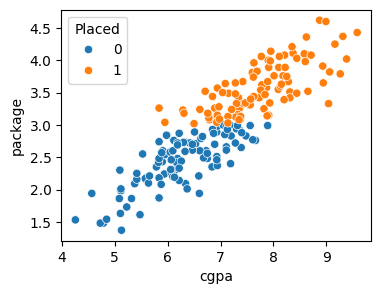

In [53]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='cgpa', y='package',data=df,hue='Placed')
plt.show()

In [54]:
x = df.iloc[:,:-1]
y = df['Placed']

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [43]:
lr.score(x_test, y_test)*100

92.5

In [45]:
# Provide only 'cgpa' and 'package' as input features
lr.predict([[8, 3.5]])[0]

np.int64(1)

In [47]:
lr.coef_, lr.intercept_

(array([[0.72915222, 4.38194893]]), array([-18.33246123]))

Text(0.5, 1.0, 'Decision Boundary')

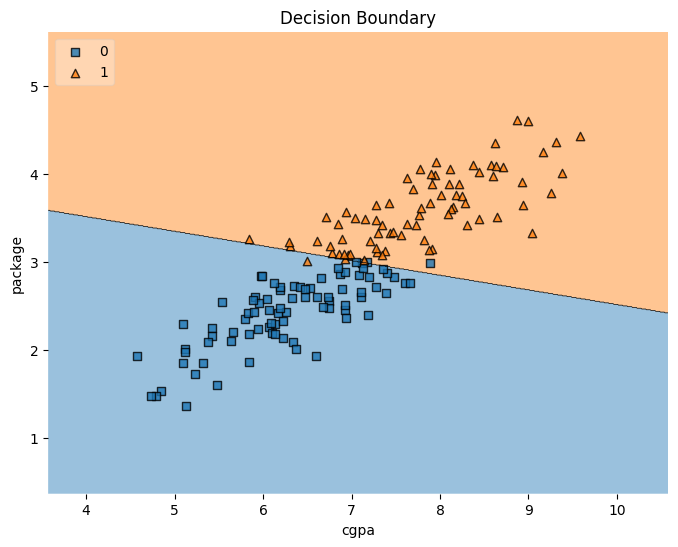

In [46]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(8,6))
plot_decision_regions(X=x_train.values, y=y_train.values, clf=lr, legend=2)
plt.xlabel('cgpa')
plt.ylabel('package')
plt.title('Decision Boundary')